In [28]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [29]:
# load dataset
df_original = pd.read_csv('bank.csv', delimiter = ';')
df = df_original

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [31]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [32]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 4521 rows and 17 columns


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [34]:
# check for null value
print("\n Column name",df.columns)


 Column name Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [35]:
#  check for data type
print("\n",df.dtypes)


 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [36]:
# check for null value
print("\n\n",df.isnull().sum())



 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [37]:
# calculating  sum of null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [38]:
# check fo duplicate data
print("\n check for duplicate \n",df.duplicated().sum())
           


 check for duplicate 
 0


In [39]:
# create dummy Variable for Purchased
df.replace(['yes','no'],[1,0],inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [40]:
# create dummies for dataframe
df = pd.get_dummies(df)

In [41]:
df.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
df.min()

age                      19
default                   0
balance               -3313
housing                   0
loan                      0
day                       1
duration                  4
campaign                  1
pdays                    -1
previous                  0
y                         0
job_admin.                0
job_blue-collar           0
job_entrepreneur          0
job_housemaid             0
job_management            0
job_retired               0
job_self-employed         0
job_services              0
job_student               0
job_technician            0
job_unemployed            0
job_unknown               0
marital_divorced          0
marital_married           0
marital_single            0
education_primary         0
education_secondary       0
education_tertiary        0
education_unknown         0
contact_cellular          0
contact_telephone         0
contact_unknown           0
month_apr                 0
month_aug                 0
month_dec           

In [43]:
# replace min with mean
df.replace(0.0, df.mean(),inplace= True)

In [44]:
df.min()

age                      19.000000
default                   0.016810
balance               -3313.000000
housing                   0.566025
loan                      0.152842
day                       1.000000
duration                  4.000000
campaign                  1.000000
pdays                    -1.000000
previous                  0.542579
y                         0.115240
job_admin.                0.105729
job_blue-collar           0.209246
job_entrepreneur          0.037160
job_housemaid             0.024773
job_management            0.214333
job_retired               0.050874
job_self-employed         0.040478
job_services              0.092236
job_student               0.018580
job_technician            0.169874
job_unemployed            0.028312
job_unknown               0.008405
marital_divorced          0.116788
marital_married           0.618668
marital_single            0.264543
education_primary         0.149967
education_secondary       0.510064
education_tertiary  

In [45]:
df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017885,0.085960,-0.193888,-0.011250,-0.017853,-0.002367,-0.005148,-0.008894,-0.006147,...,0.034671,0.057909,-0.119784,0.027659,0.081766,-0.015074,0.012693,-0.026179,0.048626,-0.017414
default,-0.017885,1.000000,-0.070751,0.006881,0.063994,-0.013261,-0.011615,-0.012348,-0.026317,-0.023744,...,-0.004950,-0.013687,0.005580,0.008962,-0.017550,-0.014105,-0.040055,0.005801,-0.022410,0.038997
balance,0.085960,-0.070751,1.000000,-0.057544,-0.072498,-0.004008,-0.016608,-0.003497,0.004067,0.023220,...,0.055931,0.022149,-0.077294,0.121256,0.059007,0.007908,0.023015,-0.002226,0.030804,-0.030756
housing,-0.193888,0.006881,-0.057544,1.000000,0.018451,-0.031291,0.015740,-0.003574,0.116893,0.033556,...,-0.085332,-0.072133,0.412996,0.006073,-0.102506,-0.060410,0.094246,0.046986,-0.088504,-0.062805
loan,-0.011250,0.063994,-0.072498,0.018451,1.000000,-0.004879,-0.004997,0.017120,-0.031086,-0.018526,...,-0.036580,-0.038525,-0.032816,0.023113,-0.024372,-0.028523,-0.011652,-0.018397,-0.050643,0.041107
day,-0.017853,-0.013261,-0.004008,-0.031291,-0.004879,1.000000,-0.024629,0.160706,-0.094352,-0.054179,...,-0.217517,-0.024570,-0.028992,0.095832,0.040235,-0.043666,-0.064235,-0.021062,-0.027720,0.075100
duration,-0.002367,-0.011615,-0.016608,0.015740,-0.004997,-0.024629,1.000000,-0.068382,0.010380,0.017606,...,-0.016196,-0.026212,0.008639,0.009572,0.004566,-0.020023,-0.012852,0.008109,0.049255,-0.015239
campaign,-0.005148,-0.012348,-0.003497,-0.003574,0.017120,0.160706,-0.068382,1.000000,-0.093137,-0.057992,...,0.044317,-0.004045,-0.076263,-0.083385,-0.058536,-0.040207,-0.094021,-0.030435,-0.058268,0.117375
pdays,-0.008894,-0.026317,0.004067,0.116893,-0.031086,-0.094352,0.010380,-0.093137,1.000000,0.511403,...,-0.110324,0.008673,0.090216,0.012549,0.059521,0.047890,0.708380,0.382970,0.212188,-0.867713
previous,-0.006147,-0.023744,0.023220,0.033556,-0.018526,-0.054179,0.017606,-0.057992,0.511403,1.000000,...,-0.075518,0.016551,0.028323,0.048723,0.085612,0.053663,0.416981,0.328524,0.223058,-0.607984


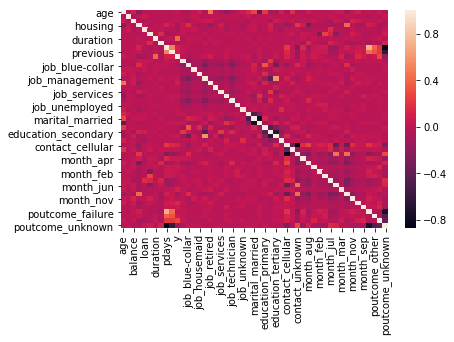

In [46]:
corr = df.corr()
sb.heatmap(corr)

In [47]:
df.shape

(4521, 49)

In [48]:
print (corr['y'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['y'].sort_values(ascending=False)[-10:])

y                     1.000000
duration              0.401118
poutcome_success      0.283481
month_oct             0.145964
contact_cellular      0.118761
previous              0.105127
pdays                 0.104087
month_mar             0.102716
job_retired           0.086675
month_sep             0.071510
month_dec             0.069884
month_apr             0.062563
education_tertiary    0.056649
poutcome_other        0.051908
job_student           0.047809
Name: y, dtype: float64 

----------------------
education_secondary   -0.028744
month_jul             -0.038851
campaign              -0.061147
marital_married       -0.064643
job_blue-collar       -0.068147
loan                  -0.070517
month_may             -0.102077
housing               -0.104683
contact_unknown       -0.139399
poutcome_unknown      -0.162038
Name: y, dtype: float64


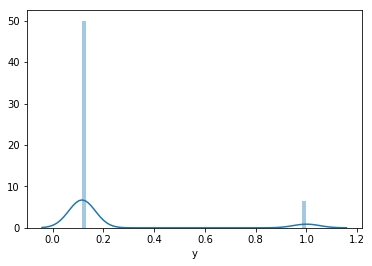

In [49]:

sb.distplot(df['y'])
# sb.distplot(df)

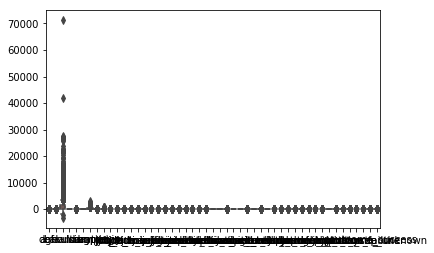

In [50]:
sb.boxplot(data=df)
plt.show()

In [51]:
def feature_scaling(df):

    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
    return df
feature_scaling(df)

        age  default   balance  housing  loan       day  duration  campaign  \
0  0.161765      0.0  0.068455      0.0   0.0  0.600000  0.024826  0.000000   
1  0.205882      0.0  0.108750      1.0   1.0  0.333333  0.071500  0.000000   
2  0.235294      0.0  0.062590      1.0   0.0  0.500000  0.059914  0.000000   
3  0.161765      0.0  0.064281      1.0   1.0  0.066667  0.064548  0.061224   
4  0.588235      0.0  0.063565      1.0   0.0  0.133333  0.073486  0.000000   

      pdays  previous  ...  month_jun  month_mar  month_may  month_nov  \
0  0.000000  0.000000  ...        0.0        0.0        0.0        0.0   
1  0.389908  0.141365  ...        0.0        0.0        1.0        0.0   
2  0.379587  0.018703  ...        0.0        0.0        0.0        0.0   
3  0.000000  0.000000  ...        1.0        0.0        0.0        0.0   
4  0.000000  0.000000  ...        0.0        0.0        1.0        0.0   

   month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.161765,0.0,0.068455,0.0,0.0,0.600000,0.024826,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.205882,0.0,0.108750,1.0,1.0,0.333333,0.071500,0.000000,0.389908,0.141365,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.235294,0.0,0.062590,1.0,0.0,0.500000,0.059914,0.000000,0.379587,0.018703,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.161765,0.0,0.064281,1.0,1.0,0.066667,0.064548,0.061224,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.588235,0.0,0.063565,1.0,0.0,0.133333,0.073486,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.235294,0.0,0.054496,0.0,0.0,0.733333,0.045349,0.020408,0.202982,0.100478,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.250000,0.0,0.048590,1.0,0.0,0.433333,0.111552,0.000000,0.379587,0.059590,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.294118,0.0,0.046442,1.0,0.0,0.166667,0.048659,0.020408,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.323529,0.0,0.047436,1.0,0.0,0.433333,0.017544,0.020408,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.352941,0.0,0.043288,1.0,1.0,0.533333,0.102284,0.000000,0.169725,0.059590,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
# seperate data set
def features(df):
    output = df.y
#     y.head()
    df = df.drop('y', axis = 1)
    print("Seperate Target column from dataset")
    return df, output
df, output = features(df)

Seperate Target column from dataset


In [53]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(output))
    test_per_y = len(output)-train_per_y

    
    y_train_data = np.array(output[:train_per_y])
    y_test_data = np.array(output[:test_per_y])
    
   
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 3164
Test dataset: 1357

Convert pandas datafrem into numpy

X train data shape: (3164, 48)
y train data shape: (3164, 1)

X test data shape: (1357, 48)
y test data shape: (1357, 1)


In [58]:
class MultiNeuralNetwork:

    def __init__(self):
        # Learning Rate
        self.l_rate = 0.001
        # Total iterations
        self.echops = 600

    #Defing a function to train our data
    def train(self, x_train_data, y_train_data):

        layers = [x_train_data.shape[1], 15, 10, 5, 1]
        z = 0
        weight = []
        baised = []
        a = [0] * len(layers)
        z = [0] * len(layers)
        dg = [0] * len(layers)
        da = [0] * len(layers)
        dz = [0] * len(layers)
        db = [0] * len(layers)
        dw = [0] * len(layers)
        
        a[0] = x_train_data.T 
        m = len(x_train_data.shape)
        n = x_train_data.shape[1]

        for j in range(1, len(layers)):
            
            weight.append(np.random.rand(layers[j], layers[j-1]) * 0.001 )
            
            baised.append(np.zeros(((layers[j], 1)) ))
            
 
        for k in range(self.echops):
            #--------------- Forward Propagation ---------------------#
            for i in range(len(layers) - 1):
                print("Layer : ", i)
#                 print("weight ", i, "= ", weight[i].shape)
#                 print("baised ", i, "= ", baised[i].shape)
        
                z[i] = np.dot(weight[i], a[i]) + baised[i]
                print("shape of Z", z[i].shape)
                
                # Sigmoid/ Activation function
                a[i+1] = 1 / (1 + np.exp(-z[i]))
                print("shape of a[i+1]", a[i+1].shape)
            
            #------------- Backward Propagation ---------------------#   
            for i in reversed(range(len(layers) - 1)):
                print("Layer : ", i)

                # d_g = a * (1 - a)
                dg[i] = (1 / (1 + np.exp(-z[i]))) * (1 - (1 / (1 + np.exp(-z[i]))))
                print("shape of dg[i]", dg[i].shape)

                
                # da = -(y/a) + ((1-y)/(1-a))
                da[i] = (-(y_train_data.T / a[i+1]) + ((1 - y_train_data.T) / (1 - a[i+1])))
                print("shape of da[i]", da[i].shape)
                

                # dz = da * d_g
                dz[i] = (da[i] * dg[i])
                print("shape of dz[i]", dz[i].shape)

                #dw = (dz * a) / m
                dw[i] = np.dot(dz[i], a[i].T) / m
                print("shape of dw[i]", dw[i].shape)

                # db = np.sum(dz)
                db[i] = np.sum(dz[i], axis=1, keepdims=True) / m
                print("shape of db[i]", db[i].shape)

                # w = w - alpha * dw
                weight[i] =  weight[i] - np.dot(self.l_rate, dw[i])
                print("shape of weight[i]", weight[i].shape)
                # b = b - alpha * db
                baised[i] = baised[i] - np.dot(self.l_rate, db[i])
                print("shape of baised[i]", baised[i].shape)
                
        
            

        return [weight, baised]
    
    def predict(self, x_test_data, parameters):
        layers = [x_train_data.shape[1], 15, 10, 5, 1]
        i = 0
        z = [0] * len(layers)
        a = [0] * len(layers)
        a[0] = x_test_data.T
        for i in range(len(layers) -1):
            z[i] = np.dot(parameters[0][i], a[i]) + parameters[1][i]
            a[i+1] = 1 / (1 + np.exp(-z[i])) 
        return a[-1]

    def accuracy(self, y_data_test, y_pred_test):

        y_pred_test = np.nan_to_num(y_pred_test)
    
        test_accuracy = 100 - (np.mean(np.abs(y_pred_test - y_data_test)) * 100)        
        return test_accuracy


def main(x_train_data,y_train_data,x_test_data,y_test_data):

    #creating object for class
    obj = MultiNeuralNetwork()
    

    
    
    parameters = obj.train(x_train_data, y_train_data)
    
    y_prediction = obj.predict(x_test_data, parameters)
    print("y_prediction",y_prediction)
    
    y_prediction_train = obj.predict(x_train_data, parameters)
    print("y_prediction_train",y_prediction_train)
    
    
    accuracy = obj.accuracy(y_test_data, y_prediction)
    accuracy_train = obj.accuracy(y_train_data, y_prediction_train)

    print("Train accuracy: ", accuracy_train)
    print("Test accuracy: ", accuracy)

main(x_train_data,y_train_data,x_test_data,y_test_data)

Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape

shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (

shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (

shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] 

shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] 

Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape

shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[

shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (

shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (

shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 

shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[

shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (

shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (

shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (

shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (

shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[

shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 

shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (

shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] 

shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3

shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] 

shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[

shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[

shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 

shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (

shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 

shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (

Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape

shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (

shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] 

shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[

shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (

shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] 

shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 

shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (

shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (

shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (

shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (

shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (

shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (

shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (

shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (

shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 

shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (

shape of dw[i] (10, 15)
shape of db[i] (10, 1)
shape of weight[i] (10, 15)
shape of baised[i] (10, 1)
Layer :  0
shape of dg[i] (15, 3164)
shape of da[i] (15, 3164)
shape of dz[i] (15, 3164)
shape of dw[i] (15, 48)
shape of db[i] (15, 1)
shape of weight[i] (15, 48)
shape of baised[i] (15, 1)
Layer :  0
shape of Z (15, 3164)
shape of a[i+1] (15, 3164)
Layer :  1
shape of Z (10, 3164)
shape of a[i+1] (10, 3164)
Layer :  2
shape of Z (5, 3164)
shape of a[i+1] (5, 3164)
Layer :  3
shape of Z (1, 3164)
shape of a[i+1] (1, 3164)
Layer :  3
shape of dg[i] (1, 3164)
shape of da[i] (1, 3164)
shape of dz[i] (1, 3164)
shape of dw[i] (1, 5)
shape of db[i] (1, 1)
shape of weight[i] (1, 5)
shape of baised[i] (1, 1)
Layer :  2
shape of dg[i] (5, 3164)
shape of da[i] (5, 3164)
shape of dz[i] (5, 3164)
shape of dw[i] (5, 10)
shape of db[i] (5, 1)
shape of weight[i] (5, 10)
shape of baised[i] (5, 1)
Layer :  1
shape of dg[i] (10, 3164)
shape of da[i] (10, 3164)
shape of dz[i] (10, 3164)
shape of dw[i] (